In [1]:
from matplotlib import pyplot as plt
from matplotlib import axes
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("csv/videogames.csv")

In [3]:
"""Task 1: Data Cleaning"""
# Fill values with meadian year and mean sales respectivily
df = df.fillna({"Year": df["Year"].median(), "Global_Sales": df["Global_Sales"].mean()})

# Drop any rows with no name
df["Name"] = df["Name"].dropna()

# Fill na values with most common Platform and Genre respectivly
df = df.fillna({"Platform": df["Platform"].mode(), "Genre": df["Genre"].mode()})

# Drop any dupelicate rows
df = df.drop_duplicates()

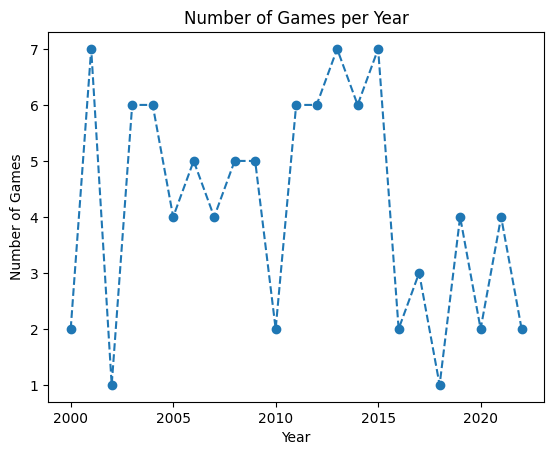

In [4]:
group = df.groupby(["Year"])["Name"].agg({"count"})

plt.plot(group.index, group["count"], marker="o", linestyle="--")
plt.title("Number of Games per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

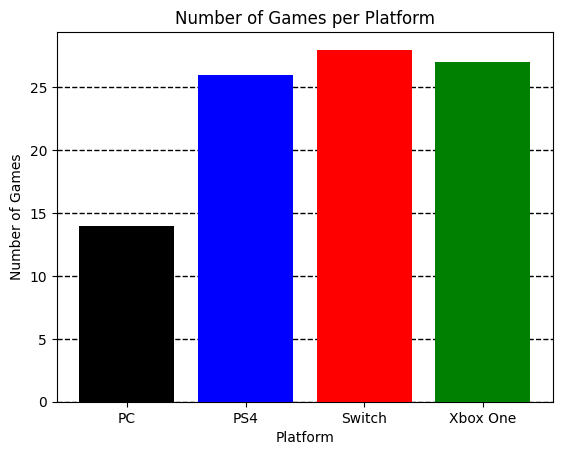

In [5]:
group = df.groupby(["Platform"])["Name"].agg({"count"})

plt.bar(group.index, group["count"], color=("black", "Blue", "red", "Green"), zorder=3)
plt.title("Number of Games per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.grid(color="black", linestyle="--", linewidth=1, axis="y", zorder=0)
plt.show()

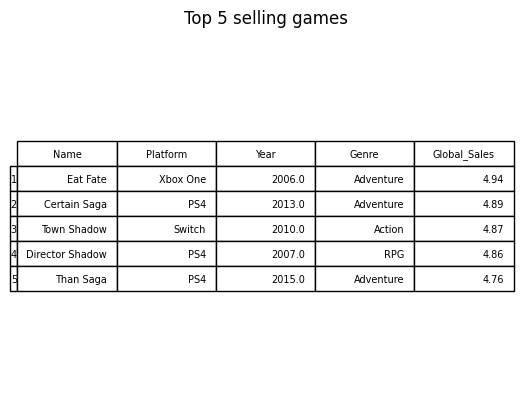

In [6]:
top5 = df.nlargest(5, "Global_Sales")
table = plt.table(cellText=top5.values, colLabels=top5.columns, rowLabels=[1, 2, 3, 4, 5], loc="center")
table.scale(1, 1.5)
plt.title("Top 5 selling games")
plt.axis("off")
plt.show()

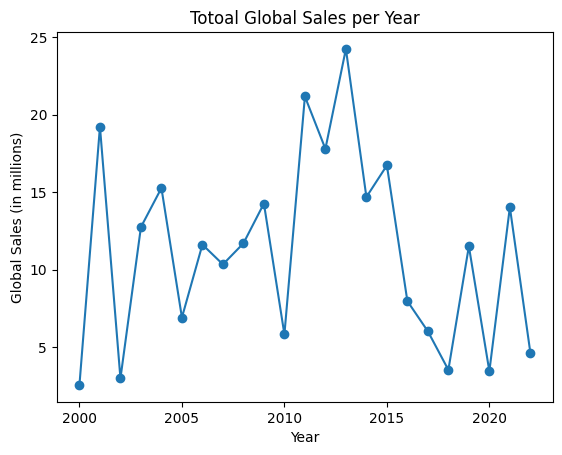

In [7]:
group = df.groupby(["Year"])["Global_Sales"].agg({"sum"})

plt.plot(group.index, group["sum"], marker="o")
plt.title("Totoal Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

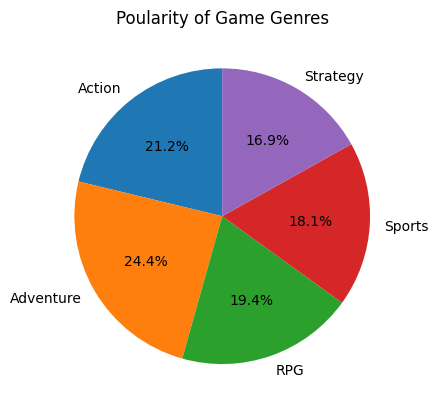

In [8]:
group = df.groupby(["Genre"])["Global_Sales"].agg({"sum"})

plt.pie(group["sum"], labels=group.index, autopct="%1.1f%%", startangle=90)
plt.title("Poularity of Game Genres")
plt.show()

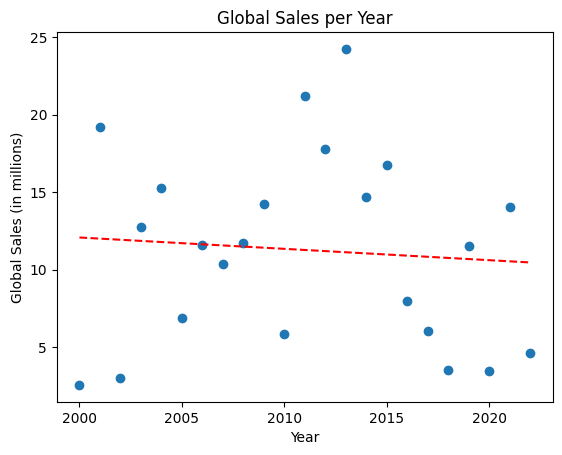

In [9]:
group = df.groupby(["Year"])["Global_Sales"].agg({"sum"})

plt.scatter(group.index, group["sum"])
plt.title("Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")

z = np.polyfit(group.index, group["sum"], 1)
p = np.poly1d(z) 
plt.plot(group.index, p(group.index), "r--")

plt.show()

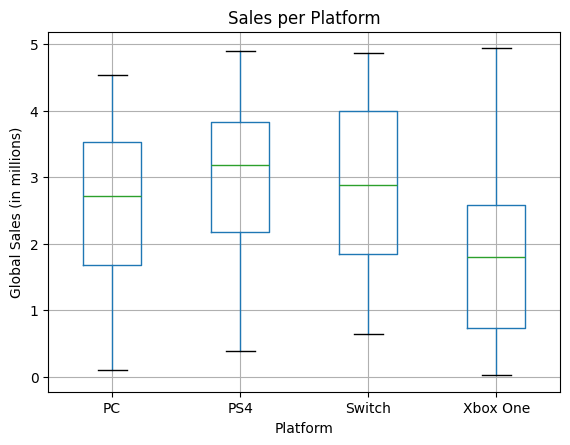

In [10]:
# Box plot
df.boxplot(column="Global_Sales", by="Platform")
plt.suptitle("")
plt.title("Sales per Platform")
plt.ylabel("Global Sales (in millions)")
plt.show()